In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin': # 오픈소스 유닉스 운영체제
    print ("유닉스")
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    print ("윈도우")
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

# 그래프 한글 깨짐 방지

윈도우


In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

df = pd.read_csv('suncell.csv')
df['날짜'] = pd.to_datetime(df['날짜'], format='%y%m%d') # y = yy , Y = yyyy
df = df.set_index('날짜')
df.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr,19Hr,20Hr,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,1.1,7.3,1.5,0.2,0.0,0,140.5,524,1949,3.200000,15.7,4.7,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,2.1,1.0,0.0,93.0,94.0,95.0,95.0,94.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,94.0,94.0,95.0,96.0,4.3,2.5,2.7,1.8,2.6,2.4,3.0,1.9,1.5,1.7,3.0,3.7,4.4,5.6,4.9,4.8,22.600000,22.200001,22.299999,23.900000,24.500000,24.299999,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,111.2,72.5,16.8,15.4,4.8,0,276.8,524,1949,16.799999,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,0.0,0.0,96.0,96.0,94.0,93.0,95.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,90.0,96.0,95.0,96.0,1.6,1.6,3.0,4.9,5.1,2.9,1.3,0.5,1.1,3.5,2.2,1.5,2.6,1.6,1.6,0.3,22.799999,22.799999,23.200001,22.299999,21.200001,21.299999,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,0.0,0.0,0.0,4.6,0.1,0,107.8,525,1948,0.000000,2.5,8.2,5.5,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,92.0,94.0,95.0,95.0,96.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,3.2,1.9,2.0,3.7,2.7,2.2,1.0,1.2,0.7,1.3,1.9,0.6,0.5,0.4,0.2,0.1,21.200001,21.000000,20.700001,20.500000,21.000000,20.799999,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,146.1,148.4,24.4,9.8,0.5,0,1012.9,525,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,86.0,90.0,91.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,96.0,96.0,96.0,96.0,2.5,1.3,2.5,2.7,0.9,1.7,2.1,0.9,0.8,0.7,0.4,0.1,0.6,0.4,0.3,0.9,24.900000,26.000000,26.400000,24.700001,24.799999,23.900000,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,184.8,153.4,84.0,48.0,1.0,0,1975.6,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2,81.0,81.0,83.0,81.0,83.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,95.0,94.0,95.0,96.0,3.0,2.8,3.2,3.5,3.9,2.7,2.2,3.0,2.2,3.0,3.6,2.6,2.3,1.2,3.0,1.4,27.500000,27.700001,26.799999,27.900000,27.000000,26.400000,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [3]:
df=df.drop(df.columns[0:16], axis=1)

In [4]:
df.head()

,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,140.5,524,1949,3.200000,15.7,4.7,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,2.1,1.0,0.0,93.0,94.0,95.0,95.0,94.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,94.0,94.0,95.0,96.0,4.3,2.5,2.7,1.8,2.6,2.4,3.0,1.9,1.5,1.7,3.0,3.7,4.4,5.6,4.9,4.8,22.600000,22.200001,22.299999,23.900000,24.500000,24.299999,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,276.8,524,1949,16.799999,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,0.0,0.0,96.0,96.0,94.0,93.0,95.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,90.0,96.0,95.0,96.0,1.6,1.6,3.0,4.9,5.1,2.9,1.3,0.5,1.1,3.5,2.2,1.5,2.6,1.6,1.6,0.3,22.799999,22.799999,23.200001,22.299999,21.200001,21.299999,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,107.8,525,1948,0.000000,2.5,8.2,5.5,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,92.0,94.0,95.0,95.0,96.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,3.2,1.9,2.0,3.7,2.7,2.2,1.0,1.2,0.7,1.3,1.9,0.6,0.5,0.4,0.2,0.1,21.200001,21.000000,20.700001,20.500000,21.000000,20.799999,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,1012.9,525,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,86.0,90.0,91.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,96.0,96.0,96.0,96.0,2.5,1.3,2.5,2.7,0.9,1.7,2.1,0.9,0.8,0.7,0.4,0.1,0.6,0.4,0.3,0.9,24.900000,26.000000,26.400000,24.700001,24.799999,23.900000,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,1975.6,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2,81.0,81.0,83.0,81.0,83.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,95.0,94.0,95.0,96.0,3.0,2.8,3.2,3.5,3.9,2.7,2.2,3.0,2.2,3.0,3.6,2.6,2.3,1.2,3.0,1.4,27.500000,27.700001,26.799999,27.900000,27.000000,26.400000,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [5]:
df_test = pd.DataFrame(df['충전시간발전량'])
df_test.head()

,충전시간발전량
날짜,
2016-07-01,140.5
2016-07-02,276.8
2016-07-03,107.8
2016-07-04,1012.9
2016-07-05,1975.6


In [6]:
df.columns[8:15] # +5, -4

Index(['강수량10hr', '강수량11hr', '강수량12hr', '강수량13hr', '강수량14hr', '강수량15hr', '강수량16hr'], dtype='object')

In [7]:
df.columns[24:31]

Index(['습도10hr', '습도11hr', '습도12hr', '습도13hr', '습도14hr', '습도15hr', '습도16hr'], dtype='object')

In [8]:
df.columns[40:47]

Index(['풍속10hr', '풍속11hr', '풍속12hr', '풍속13hr', '풍속14hr', '풍속15hr', '풍속16hr'], dtype='object')

In [9]:
df.columns[56:63]

Index(['기온10hr', '기온11hr', '기온12hr', '기온13hr', '기온14hr', '기온15hr', '기온16hr'], dtype='object')

In [10]:
df_test['하루 총 강수량'] = df.iloc[:,8:15].sum(axis=1) # 행 row , 열 column , axis = 0 column 연산, axis = 1 row 연산
df_test['하루 총 습도'] = df.iloc[:,24:31].sum(axis=1)
df_test['하루 총 풍속'] = df.iloc[:,40:47].sum(axis=1)
df_test['하루 총 기온'] = df.iloc[:,56:63].sum(axis=1)
df_test.head()

,충전시간발전량,하루 총 강수량,하루 총 습도,하루 총 풍속,하루 총 기온
날짜,,,,,
2016-07-01,140.5,0.3,642.0,17.2,169.700000
2016-07-02,276.8,0.0,666.0,13.0,144.999998
2016-07-03,107.8,1.0,668.0,8.9,151.100000
2016-07-04,1012.9,0.0,663.0,6.7,163.500000
2016-07-05,1975.6,0.0,643.0,19.3,175.800000


In [11]:
# df_test['하루 총 강수량'] = df.iloc[:,3:19].sum(axis=1) # 행 row , 열 column , axis = 0 column 연산, axis = 1 row 연산
# df_test['하루 총 습도'] = df.iloc[:,19:35].sum(axis=1)
# df_test['하루 총 풍속'] = df.iloc[:,35:51].sum(axis=1)
# df_test['하루 총 기온'] = df.iloc[:,51:(51+15+1)].sum(axis=1)
# df_test.head()

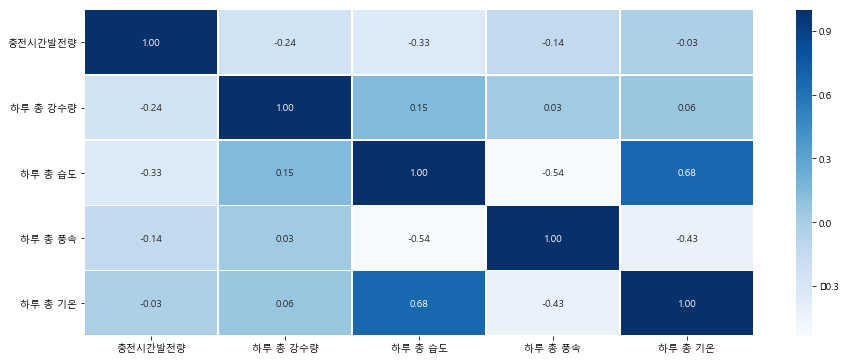

In [12]:
corr = df_test.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

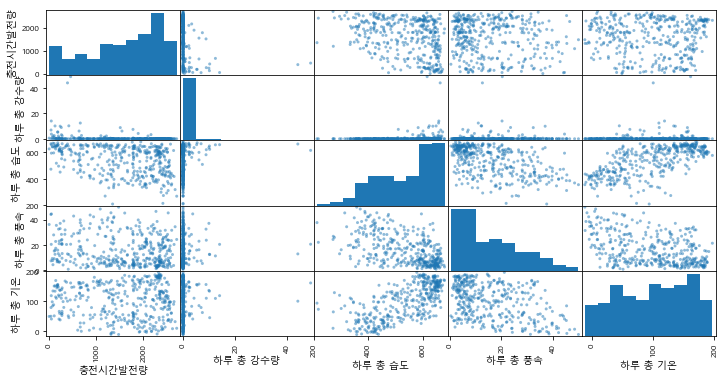

In [13]:
scatter_matrix(df_test, figsize=(12, 6))
plt.show()

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

x = df_test.drop(columns=['충전시간발전량'])
scaler_X.fit(x)
x = pd.DataFrame(scaler_X.transform(x), index=x.index, columns=x.columns)

y = df_test[['충전시간발전량']]
scaler_Y.fit(y)
y = pd.DataFrame(scaler_Y.transform(y), index=y.index, columns=y.columns)

In [16]:
# Data reshape           shift 함수 처럼 데이터 밀려 쌓기
def dataset_reshape(dataset, window_size=1):
    data = []
    for i in range(len(dataset) - window_size - 1): # -1 이유 windows size 7 이 입력 될 때 0~6 까지 7개 값
        change_data = dataset[i:(i+window_size)]
        data.append(np.array(change_data))
    return np.array(data)

In [17]:
x_train = x[:int(len(x) * 80 / 100)]
y_train = y[:int(len(y) * 80 / 100)]
x_test = x[int(len(x) * 80 / 100) :]
y_test = y[int(len(y) * 80 / 100) :]
x_train = dataset_reshape(x_train, 7)
y_train = dataset_reshape(y_train['충전시간발전량'], 7)
x_test = dataset_reshape(x_test, 7)
y_test = dataset_reshape(y_test['충전시간발전량'], 7)
print('x_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

x_train :  (297, 7, 4)
y_train :  (297, 7)
x_test :  (69, 7, 4)
y_test :  (69, 7)


In [18]:
# 모델 생성
model65 = Sequential()
model65.add(LSTM(100, input_shape = (7, 4)))
model65.add(Dropout(0.2))
model65.add(Dense(7))
model65.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [19]:
model65.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 42,707
Trainable params: 42,707
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 손실 이력 객체 생성
history = LossHistory()
history.init()

hist = model65.fit(x_train, y_train, epochs=40, batch_size=14, verbose=2, validation_data=(x_test, y_test), callbacks=[history])
print("Training Done! loss : %.4f  val_loss : %.4f"%(hist.history['loss'][-1],hist.history['val_loss'][-1]))

Train on 297 samples, validate on 69 samples
Epoch 1/40
 - 1s - loss: 0.2041 - acc: 0.1953 - val_loss: 0.1069 - val_acc: 0.1594
Epoch 2/40
 - 0s - loss: 0.0973 - acc: 0.1347 - val_loss: 0.0957 - val_acc: 0.2174
Epoch 3/40
 - 0s - loss: 0.0949 - acc: 0.1481 - val_loss: 0.1005 - val_acc: 0.1594
Epoch 4/40
 - 0s - loss: 0.0913 - acc: 0.1582 - val_loss: 0.0930 - val_acc: 0.1884
Epoch 5/40
 - 0s - loss: 0.0895 - acc: 0.1717 - val_loss: 0.0908 - val_acc: 0.2029
Epoch 6/40
 - 0s - loss: 0.0877 - acc: 0.1650 - val_loss: 0.0936 - val_acc: 0.1449
Epoch 7/40
 - 0s - loss: 0.0868 - acc: 0.1279 - val_loss: 0.0915 - val_acc: 0.1449
Epoch 8/40
 - 0s - loss: 0.0851 - acc: 0.1448 - val_loss: 0.0903 - val_acc: 0.1739
Epoch 9/40
 - 0s - loss: 0.0818 - acc: 0.1616 - val_loss: 0.0877 - val_acc: 0.1739
Epoch 10/40
 - 0s - loss: 0.0794 - acc: 0.1549 - val_loss: 0.0849 - val_acc: 0.1159
Epoch 11/40
 - 0s - loss: 0.0785 - acc: 0.1448 - val_loss: 0.0843 - val_acc: 0.1304
Epoch 12/40
 - 0s - loss: 0.0782 - acc: 

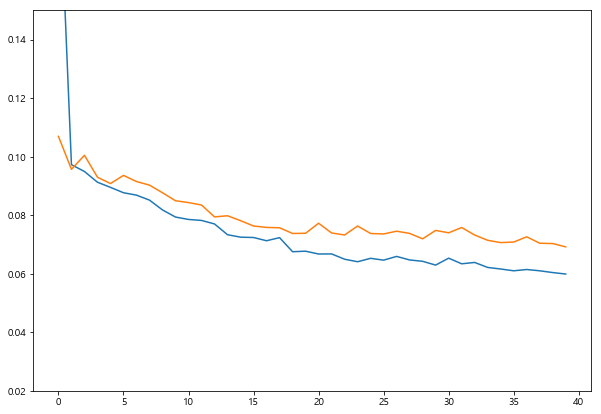

In [21]:
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.02,0.15)

plt.show()

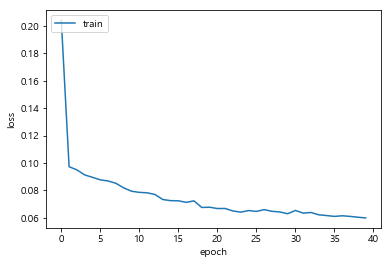

69/69 [==============================] - 0s 87us/step
Test RMSE: 0.263


In [22]:
# 학습 시각화
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

model65.evaluate(x_test, y_test)
yhat = model65.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

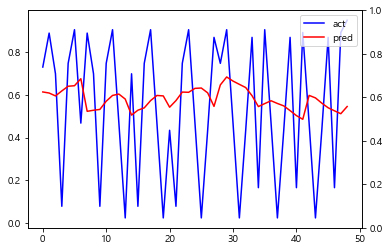

In [23]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# y_test_tuple로 만들지 않고 y_test, y_pred로 그래프 찍으면 해석하기가 어려워 일부만 확인
y_test_tuple = (y_test[0], y_test[1], y_test[2], y_test[3], y_test[4], y_test[5], y_test[6])
y_hat_tuple = (yhat[0], yhat[1], yhat[2], yhat[3], yhat[4], yhat[5], yhat[6])
acc_ax = loss_ax.twinx()
# y_value = y['충전시간발전량'][-len(yhat):]
loss_ax.plot(np.concatenate(y_test_tuple), 'b', label='act')
# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(np.concatenate(y_hat_tuple), 'r', label='pred')

# acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper right')

plt.show()

In [24]:
(y_test[1], yhat[1])

(array([0.88847007, 0.69822616, 0.07856615, 0.74700665, 0.90436068,
        0.46751663, 0.02416851]),
 array([0.52271473, 0.5276884 , 0.53153586, 0.5698862 , 0.59693515,
        0.6033711 , 0.5799866 ], dtype=float32))

# 전체 컬럼

In [25]:
df2 = df.copy()
df2.head()

,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,140.5,524,1949,3.200000,15.7,4.7,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,2.1,1.0,0.0,93.0,94.0,95.0,95.0,94.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,94.0,94.0,95.0,96.0,4.3,2.5,2.7,1.8,2.6,2.4,3.0,1.9,1.5,1.7,3.0,3.7,4.4,5.6,4.9,4.8,22.600000,22.200001,22.299999,23.900000,24.500000,24.299999,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,276.8,524,1949,16.799999,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,0.0,0.0,96.0,96.0,94.0,93.0,95.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,90.0,96.0,95.0,96.0,1.6,1.6,3.0,4.9,5.1,2.9,1.3,0.5,1.1,3.5,2.2,1.5,2.6,1.6,1.6,0.3,22.799999,22.799999,23.200001,22.299999,21.200001,21.299999,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,107.8,525,1948,0.000000,2.5,8.2,5.5,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,92.0,94.0,95.0,95.0,96.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,3.2,1.9,2.0,3.7,2.7,2.2,1.0,1.2,0.7,1.3,1.9,0.6,0.5,0.4,0.2,0.1,21.200001,21.000000,20.700001,20.500000,21.000000,20.799999,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,1012.9,525,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,86.0,90.0,91.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,96.0,96.0,96.0,96.0,2.5,1.3,2.5,2.7,0.9,1.7,2.1,0.9,0.8,0.7,0.4,0.1,0.6,0.4,0.3,0.9,24.900000,26.000000,26.400000,24.700001,24.799999,23.900000,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,1975.6,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2,81.0,81.0,83.0,81.0,83.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,95.0,94.0,95.0,96.0,3.0,2.8,3.2,3.5,3.9,2.7,2.2,3.0,2.2,3.0,3.6,2.6,2.3,1.2,3.0,1.4,27.500000,27.700001,26.799999,27.900000,27.000000,26.400000,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [26]:
df_test2 = pd.DataFrame(df['충전시간발전량'])
df_test2.head()

,충전시간발전량
날짜,
2016-07-01,140.5
2016-07-02,276.8
2016-07-03,107.8
2016-07-04,1012.9
2016-07-05,1975.6


In [27]:
df_test2 = pd.concat([df_test2, df.iloc[:,8:15], df.iloc[:,24:31], df.iloc[:,40:47], df.iloc[:,56:63]], axis=1)
df_test2.head()

,충전시간발전량,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,140.5,0.0,0.3,0.0,0.0,0.0,0.0,0.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,2.4,3.0,1.9,1.5,1.7,3.0,3.7,24.299999,24.100000,23.6,24.299999,24.200001,24.700001,24.500000
2016-07-02,276.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,2.9,1.3,0.5,1.1,3.5,2.2,1.5,21.299999,20.299999,21.0,21.000000,20.400000,20.400000,20.600000
2016-07-03,107.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,2.2,1.0,1.2,0.7,1.3,1.9,0.6,20.799999,21.000000,21.4,21.700001,22.000000,22.100000,22.100000
2016-07-04,1012.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,1.7,2.1,0.9,0.8,0.7,0.4,0.1,23.900000,23.799999,23.6,23.600000,23.000000,22.900000,22.700001
2016-07-05,1975.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,2.7,2.2,3.0,2.2,3.0,3.6,2.6,26.400000,25.900000,25.6,24.900000,24.900000,24.500000,23.600000


In [28]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

x = df_test2.drop(columns=['충전시간발전량'])
scaler_X.fit(x)
x = pd.DataFrame(scaler_X.transform(x), index=x.index, columns=x.columns)

y = df_test2[['충전시간발전량']]
scaler_Y.fit(y)
y = pd.DataFrame(scaler_Y.transform(y), index=y.index, columns=y.columns)

In [29]:
x_train = x[:int(len(x) * 80 / 100)]
y_train = y[:int(len(y) * 80 / 100)]
x_test = x[int(len(x) * 80 / 100) :]
y_test = y[int(len(y) * 80 / 100) :]
x_train = dataset_reshape(x_train, 7)
y_train = dataset_reshape(y_train['충전시간발전량'], 7)
x_test = dataset_reshape(x_test, 7)
y_test = dataset_reshape(y_test['충전시간발전량'], 7)
print('x_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

x_train :  (297, 7, 28)
y_train :  (297, 7)
x_test :  (69, 7, 28)
y_test :  (69, 7)


In [30]:
# 모델 생성
model28 = Sequential()
model28.add(LSTM(100, input_shape = (7, 28)))
model28.add(Dropout(0.2))
model28.add(Dense(7))
model28.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [31]:
model28.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               51600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 52,307
Trainable params: 52,307
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 손실 이력 객체 생성
history = LossHistory()
history.init()

hist = model28.fit(x_train, y_train, epochs=40, batch_size=14, verbose=2, validation_data=(x_test, y_test), callbacks=[history])
print("Training Done! loss : %.4f  val_loss : %.4f"%(hist.history['loss'][-1],hist.history['val_loss'][-1]))

Train on 297 samples, validate on 69 samples
Epoch 1/40
 - 1s - loss: 0.1596 - acc: 0.1684 - val_loss: 0.0998 - val_acc: 0.1304
Epoch 2/40
 - 0s - loss: 0.1001 - acc: 0.1279 - val_loss: 0.0958 - val_acc: 0.1449
Epoch 3/40
 - 0s - loss: 0.0944 - acc: 0.1717 - val_loss: 0.0935 - val_acc: 0.1594
Epoch 4/40
 - 0s - loss: 0.0936 - acc: 0.1919 - val_loss: 0.0929 - val_acc: 0.1594
Epoch 5/40
 - 0s - loss: 0.0896 - acc: 0.1549 - val_loss: 0.0895 - val_acc: 0.1884
Epoch 6/40
 - 0s - loss: 0.0846 - acc: 0.1414 - val_loss: 0.0877 - val_acc: 0.1449
Epoch 7/40
 - 0s - loss: 0.0843 - acc: 0.1313 - val_loss: 0.0860 - val_acc: 0.1594
Epoch 8/40
 - 0s - loss: 0.0795 - acc: 0.1380 - val_loss: 0.0846 - val_acc: 0.1594
Epoch 9/40
 - 0s - loss: 0.0776 - acc: 0.1515 - val_loss: 0.0839 - val_acc: 0.0870
Epoch 10/40
 - 0s - loss: 0.0736 - acc: 0.1650 - val_loss: 0.0762 - val_acc: 0.1159
Epoch 11/40
 - 0s - loss: 0.0725 - acc: 0.1582 - val_loss: 0.0750 - val_acc: 0.1884
Epoch 12/40
 - 0s - loss: 0.0657 - acc: 

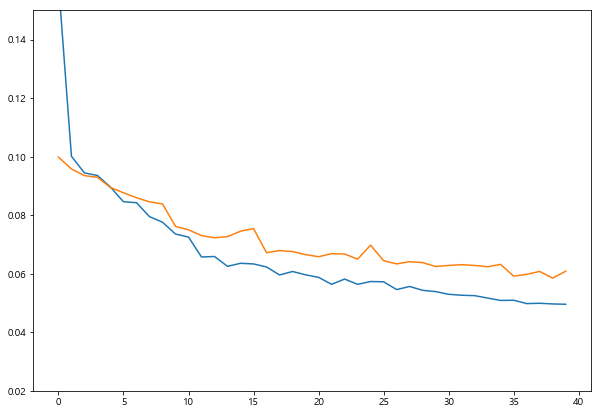

In [36]:
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.02,0.15)

plt.show()

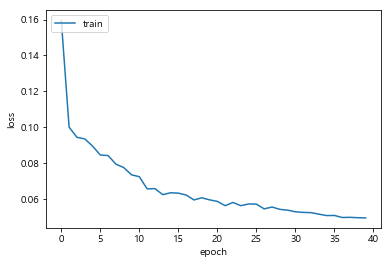

69/69 [==============================] - 0s 72us/step
Test RMSE: 0.247


In [37]:
# 학습 시각화
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

model28.evaluate(x_test, y_test)
yhat = model28.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

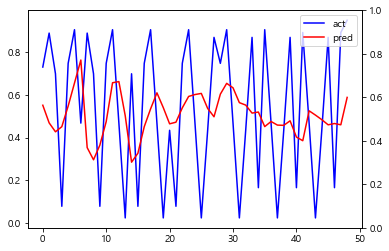

In [38]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# y_test_tuple로 만들지 않고 y_test, y_pred로 그래프 찍으면 해석하기가 어려워 일부만 확인
y_test_tuple = (y_test[0], y_test[1], y_test[2], y_test[3], y_test[4], y_test[5], y_test[6])
y_hat_tuple = (yhat[0], yhat[1], yhat[2], yhat[3], yhat[4], yhat[5], yhat[6])
acc_ax = loss_ax.twinx()
# y_value = y['충전시간발전량'][-len(yhat):]
loss_ax.plot(np.concatenate(y_test_tuple), 'b', label='act')
# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(np.concatenate(y_hat_tuple), 'r', label='pred')

# acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper right')

plt.show()